In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('../')

In [2]:
import os
from indigo import Indigo
from indigo.renderer import IndigoRenderer
import matplotlib.pyplot as plt
import matplotlib.patches as patches

import cv2
import numpy as np
from rdkit import Chem
from rdkit.Chem import rdAbbreviations

indigo = Indigo()
renderer = IndigoRenderer(indigo)

In [80]:
import pandas as pd
train_df = pd.read_csv('../data/molbank/indigo-data/train.csv')

In [ ]:
# mol = indigo.loadMolecule('[R]C(NC1=NC2=CC=CC=C2S1)=O')
# m = Chem.MolFromSmiles('COc1ccc(C(=O)[O-])cc1')
m = Chem.MolFromSmiles('CCCCOC1=CC(C)=C([N+](=O)[O-])C(C)=C1')
display(m)
print(m.GetNumAtoms())
abbrevs = rdAbbreviations.GetDefaultAbbreviations()
nm = rdAbbreviations.CondenseMolAbbreviations(m,abbrevs,sanitize=True)

# print(Chem.MolToV3KMolBlock(nm))
Chem.MolToMolFile(nm, 'tmp.mol', forceV3000=True)

(510, 423, 3)
[255. 255. 255.]
[1. 1. 1.]


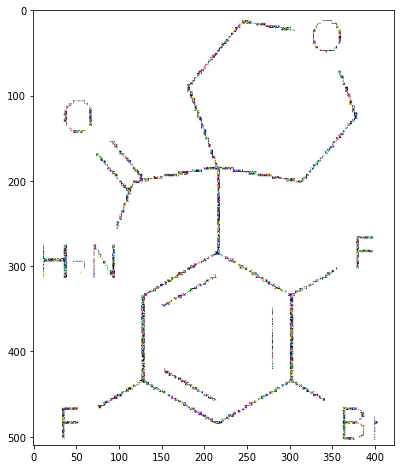

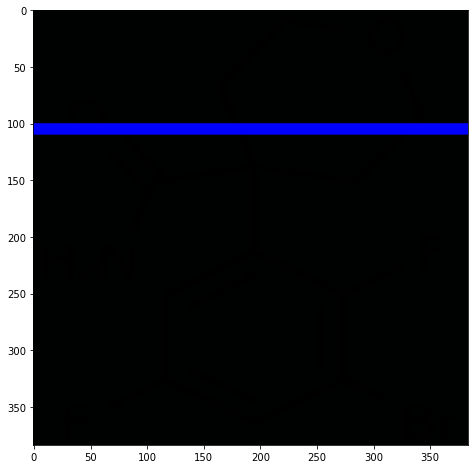

In [423]:
import json
import albumentations as A
from albumentations.pytorch import ToTensorV2
from bms.augment import ExpandSafeRotate, CropWhite, ResizePad

def get_transforms(labelled=True):
    trans_list = []
    if labelled:
        trans_list += [
            A.Downscale(scale_min=0.25, scale_max=0.5),
            A.Blur(),
            A.GaussNoise(always_apply=True)
        ]
#     trans_list.append(CropWhite(pad=3))
#     trans_list.append(A.Resize(384, 384))
    mean = [0.485, 0.456, 0.406]
    std = [0.229, 0.224, 0.225]
    trans_list += [
#         A.ToGray(p=1),
#         A.Normalize(mean=mean, std=std),
#         ToTensorV2(),
    ]
    return A.Compose(trans_list)

transform = get_transforms()

with open('../image/115.json') as f:
    obj = json.load(f)
img = np.asarray(obj['image'])
# plt.imshow(obj['raw'])
# plt.show()
image = np.asarray(obj['raw'], dtype=np.uint8)
print(image.shape)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB).astype(np.float32)
print(image[0][0])
augmented = transform(image=image)['image']
print(augmented[0][0])
plt.figure(figsize=(8,8))
plt.imshow(augmented)
plt.show()
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]
img = (img.transpose(1,2,0) * std + mean) * 255
img = img.astype(int)
img[100:110] = [0,0,255]
plt.figure(figsize=(8,8))
plt.imshow(img)
cv2.imwrite('10.png', img)
grid = obj['grid']
# for i, row in enumerate(grid):
#     for j, c in enumerate(row):
#         if c == 0:
#             print(' ', end='')
#         else:
#             print(c, end='')
#     print()

(214, 404, 3)


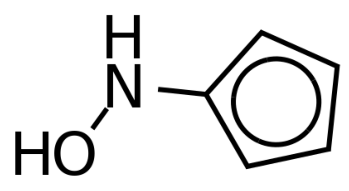

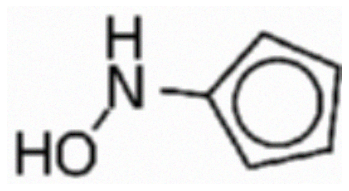

In [457]:
mol = indigo.loadMolecule('ONc1cccc1')
indigo.setOption('render-background-color', '1,1,1')
indigo.setOption('render-output-format', 'png')
indigo.setOption('render-superatom-mode', 'collapse')
indigo.setOption('render-bond-length', '100')
indigo.setOption('render-relative-thickness', 1.8)
indigo.setOption('render-bond-line-width', 1.)
indigo.setOption('render-label-mode', 'terminal-hetero') # "all", "terminal-hetero", "hetero"
indigo.setOption('render-implicit-hydrogens-visible', True)
indigo.setOption('render-stereo-style', 'none')
img = renderer.renderToBuffer(mol)
img_array = np.asarray(bytearray(img), dtype=np.uint8)
img = cv2.imdecode(img_array, 1)
# img = np.repeat(np.expand_dims(img, 2), 3, axis=2)
plt.imshow(img)
# plt.xlim(0, 900)
# plt.ylim(400)
# plt.scatter(data[:,2],data[:,3])

print(img.shape)
mol.layout()
nodes = []
for atom in mol.iterateAtoms():
#     print(atom.xyz(), atom.coords())
    nodes.append(atom.coords())
nodes = np.array(nodes)

# plt.scatter(nodes[:,0], nodes[:,1])
plt.axis('off')
plt.show()

transform = A.Compose([
    A.Downscale(scale_min=0.25, scale_max=0.5),
    A.Blur(),
    A.GaussNoise()
])

aug_img = transform(image=img)['image']
plt.imshow(aug_img)
plt.axis('off')
plt.show()

CC(C)C1=NC(C2=C(F)C(NS(=O)(=O)C3=C(F)C=CC=C3F)=CC=C2)=C(C2=NC(N)=NC=C2)S1
(663, 1038, 3)


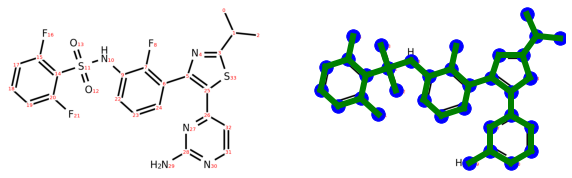

[C-]#[N+]C(=CN(C)C)C(=O)OCC
(387, 534, 3)


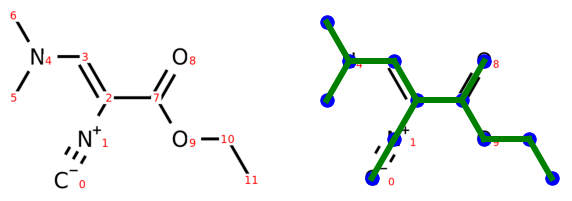

CCCCOC1=CC(C)=C([N+](=O)[O-])C(C)=C1
(373, 921, 3)


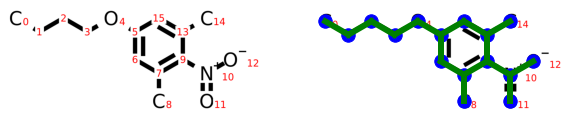

CCCC[Sn](CCCC)(CCCC)C1=CN=C(C)C=C1
(582, 690, 3)


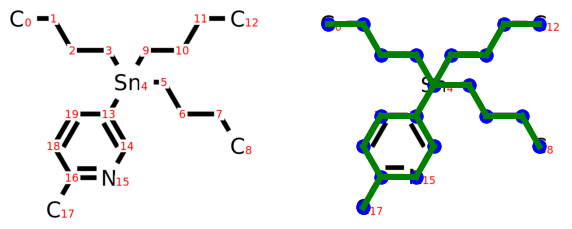

CC1=C([N+](=O)[O-])C(=O)N2CCC3=CC(C(O)(C(F)(F)F)C(F)(F)F)=CC1=C32
(509, 896, 3)


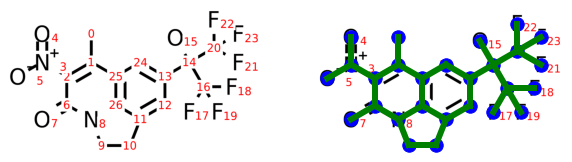

COC(=O)C(C)COS(C)(=O)=O
(308, 702, 3)


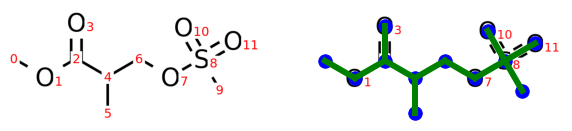

CC(CF)(CF)C1=NOC(NC(=O)OC2=CC=CC=C2)=C1
(324, 956, 3)


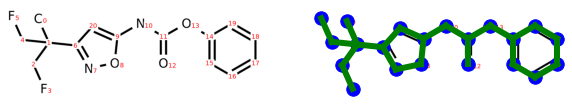

N#CC1=CC=C(N(CC2=CC(F)=C(OS(N)(=O)=O)C=C2)N2C=NN=C2)C=C1
(574, 1193, 3)


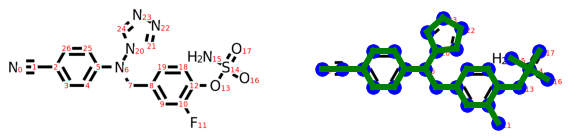

CCOC(=O)C(C)C1=CC=C(CCl)C=C1
(352, 892, 3)


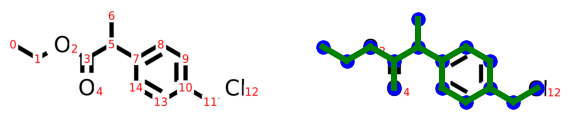

CCCOC1=C(C2=NC3=C(C(C)=NN3CCC)C(=O)[NH]2)C=CC=C1
(655, 720, 3)


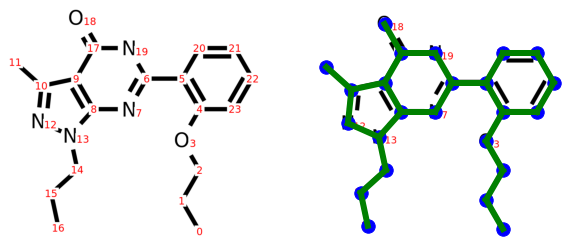

CC1=C(C2=COC3=C(C2=O)C(Cl)=CC(OCC(=O)O)=C3)C=CC=C1
(480, 1034, 3)


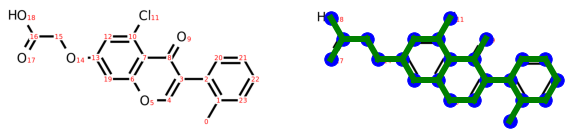

O=C(CCCN1CCC(C(=O)C2=CC=C3C=C(Cl)C=CC3=C2)CC1)C1=CC=C(F)C=C1
(506, 1558, 3)


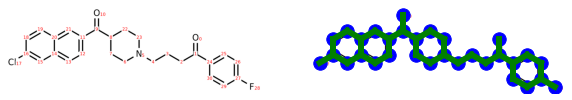

CC(C)(C)OC(=O)N1CCN(C(=O)OCC2=CC=CC=C2)C(C(=O)O)C1
(669, 1010, 3)


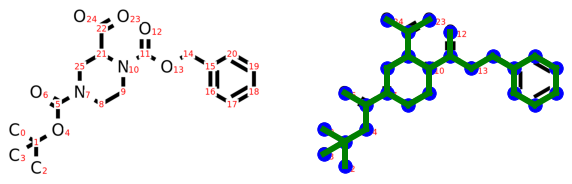

C=CC(=O)N1CC2=C(C=CC(OC)=C2)SC(Cl)C1
(503, 1005, 3)


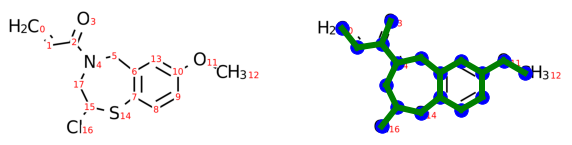

NC(CC1=CC=CS1)C(=O)O
(293, 552, 3)


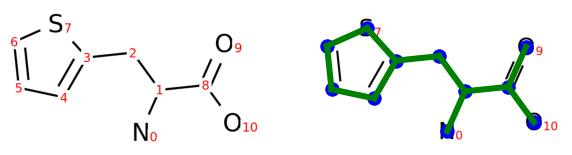

ClC1=NC(Cl)=NC(CC2=CC=CC=C2)=C1
(363, 664, 3)


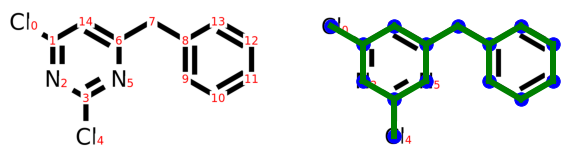

NC1=NC2=C(S1)C(=O)C1=C(C=C(F)C=C1)CC2
(357, 827, 3)


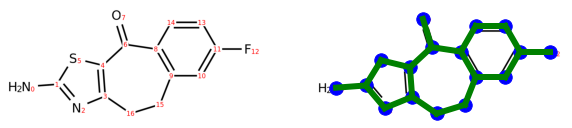

CCNC(=O)NC1=C(F)C=C(OC2=CC=NC3=CC(OC)=C(C(=O)OC)C=C32)C=C1
(568, 1271, 3)


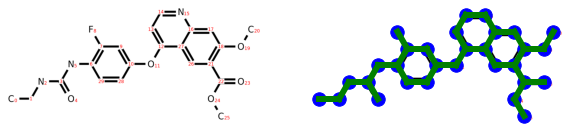

CC(C)CC(OC(C1=CC=C(Br)C=C1)C(C)C)C(=O)NCC#N
(497, 1076, 3)


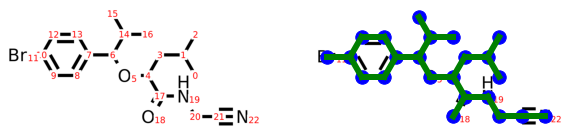

CC(C)(C)C1=CC(CO[SiH](C2=CC=CC=C2)C2=CC=CC=C2)=C(CCCC(O)CCCC2=CC=CC=C2)C=C1
(780, 1337, 3)


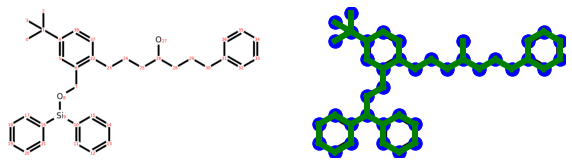

CC1NC(N)=NC2=C(Cl)C=CC(Cl)=C21
(466, 588, 3)


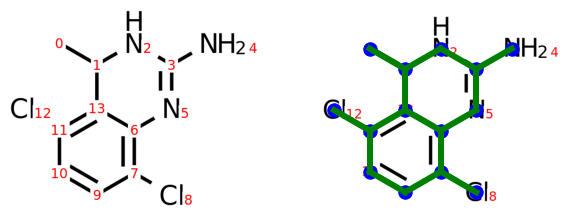

In [512]:
import random
import pandas as pd
from tqdm import tqdm
import sys
sys.path.append('/Mounts/rbg-storage1/users/yujieq/bms')
from bms.dataset import generate_indigo_image

df = pd.read_csv('../data/molbank/indigo-data/train.csv')

for idx, row in df.iterrows():
    smiles = row['SMILES']
    print(smiles)
    plt.figure(figsize=(10,5))
#     img, _, graph, success = generate_indigo_image(smiles, debug=True)
#     plt.subplot(1,2,1)
#     print(img.shape)
#     h, w, _ = img.shape
#     coords = np.array(graph['coords'])
#     plt.scatter(coords[:,1]*w, coords[:,0]*h)
#     plt.imshow(img)
    img, _, graph, success = generate_indigo_image(smiles, debug=True, mol_augment=False)
    print(img.shape)
    plt.subplot(1,2,1)
    plt.imshow(img)
    plt.axis('off')
    plt.subplot(1,2,2)
    plt.axis('off')
    plt.imshow(img)
    h, w, _ = img.shape
    coords = np.array(graph['coords'])
    x = coords[:,1]*w
    y = coords[:,0]*h
    for i in range(len(x)):
        for j in range(len(x)):
            if graph['edges'][i][j] != 0 and i < j:
                plt.plot([x[i], x[j]], [y[i], y[j]], 'g', linewidth=6)
    plt.scatter(x, y, 180, color='b')
    plt.xlim(-20,w+10)
    plt.ylim(h+10,-20)
    plt.show()
    if idx >= 20:
        break

<class 'array.array'>
11035
(174, 343, 3)


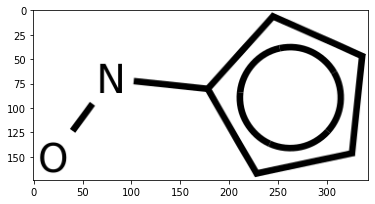

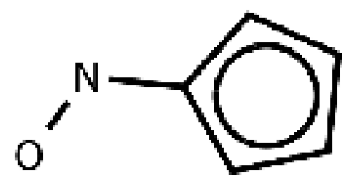

In [442]:
mol = indigo.loadMolecule("ONc1cccc1")
indigo.setOption('render-background-color', '1,1,1')
indigo.setOption('render-output-format', 'png')
# renderer.renderToFile(mol1, "mol.png")
img = renderer.renderToBuffer(mol)
print(type(img))
print(len(img))
img_array = np.asarray(bytearray(img), dtype=np.uint8)
img = cv2.imdecode(img_array, 0)
img = np.repeat(np.expand_dims(img, 2), 3, axis=2)
print(img.shape)
plt.imshow(img)
plt.show()

import albumentations as A
transform = A.Compose([
    A.Downscale(scale_min=0.25, scale_max=0.5),
    A.Blur(),
    A.GaussNoise()
])

aug_img = transform(image=img)['image']
plt.imshow(aug_img)
plt.axis('off')
plt.show()

In [ ]:
import os
import pandas as pd

for split in ['train', 'valid', 'test']:
    df = pd.read_csv(f'data/molbank/chemdraw-data/{split}.csv')
    for i, row in df.iterrows():
        path = row['file_path'].replace('chemdraw-data', 'indigo-data')
        if 'abb-images' in path:
            continue
        dirname, filename = os.path.split(path)
        os.makedirs(dirname, exist_ok=True)
        try:
            mol = indigo.loadMolecule(row['SMILES'])
            renderer.renderToFile(mol, path)
        except:
            print(path, row['SMILES'])

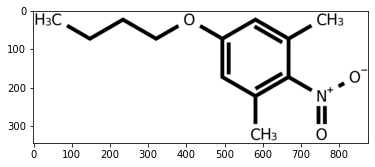

In [428]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import rdkit.Chem as Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
from IPython.display import SVG


path = 'data/molbank/chemdraw-data/images/sty3-images/8001.png'
smiles = 'C1C2C3C2[C@]4(C1[C@@]3(C5C6C7C6C(=O)C5C74)O)O'

path = "data/molbank/chemdraw-data/images/std-images/2.png"
smiles = "CCCCOC1=CC(C)=C([N+](=O)[O-])C(C)=C1"

# img = cv2.imread(path)
# plt.imshow(img)
# plt.show()

# smiles = "COC(O)=NC1CCN(CCCC(=N)S)C1"

indigo.setOption('render-bond-length', '100')
indigo.setOption('render-relative-thickness', 1.)
indigo.setOption('render-bond-line-width', 3.)
indigo.setOption('render-label-mode', 'terminal-hetero') # "all", "terminal-hetero", "hetero"
indigo.setOption('render-implicit-hydrogens-visible', True)
indigo.setOption('render-stereo-style', 'none')
mol = indigo.loadMolecule(smiles)
renderer.renderToFile(mol, 'mol.png')

img = cv2.imread('mol.png')
plt.figure()
plt.imshow(img)
plt.show()

# mol = Chem.MolFromSmiles("COC(O)=NC1CCN(CCCC(=N)S)C1")
# img = Draw.MolsToGridImage([mol], subImgSize=(384,384), molsPerRow=1, useSVG=True)
# display(SVG(img.data))


In [51]:
import albumentations as A
from bms.augment import CropWhite

def get_transforms():
    trans_list = []
    trans_list.append(CropWhite(pad=3))
    trans_list.append(A.Resize(384, 384))
    trans_list += [
        A.Normalize(
            mean=[0.485, 0.456, 0.406],
            std=[0.229, 0.224, 0.225],
        )
    ]
    return A.Compose(trans_list)

transform = get_transforms()

data/molbank/indigo-data/images/std-images/92730.png
(666, 1441, 3)


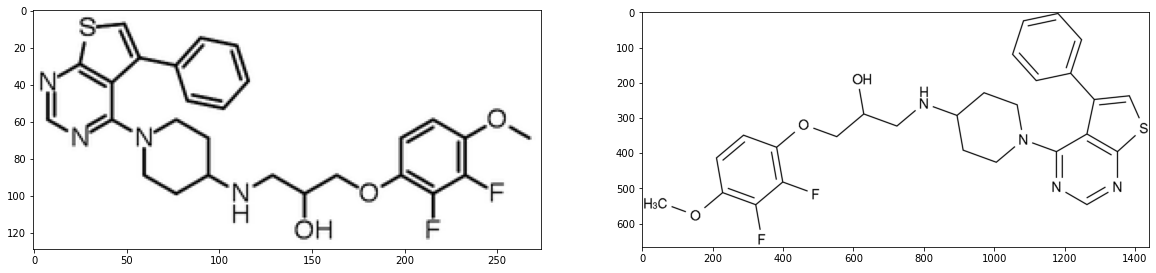

data/molbank/indigo-data/images/std-images/92731.png
(635, 1662, 3)


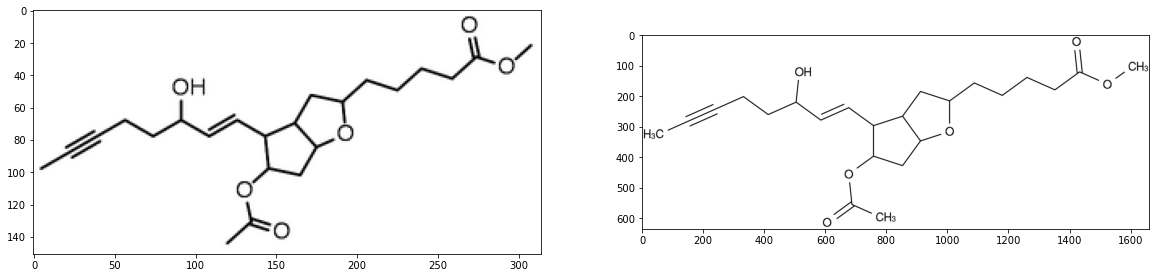

data/molbank/indigo-data/images/std-images/92732.png
(680, 1388, 3)


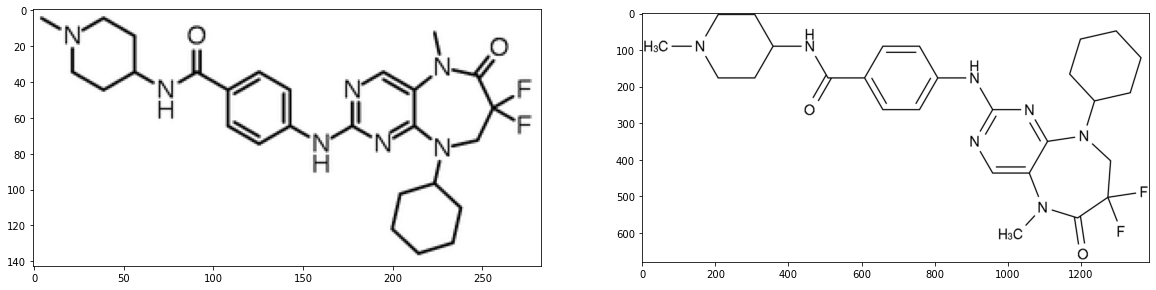

data/molbank/indigo-data/images/std-images/92733.png
(93, 515, 3)


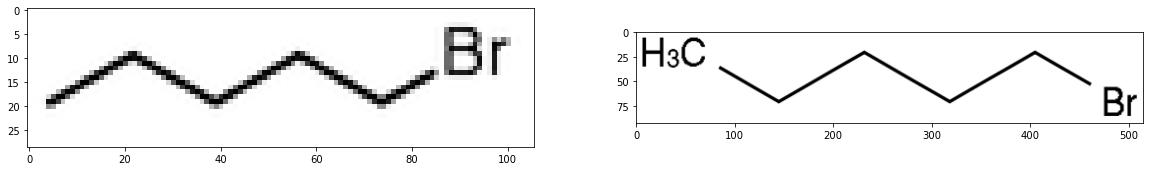

data/molbank/indigo-data/images/std-images/92734.png
(243, 599, 3)


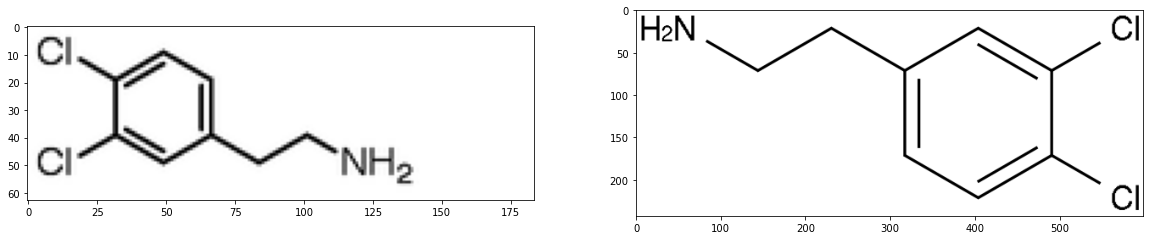

In [76]:
PATH = '/data/rsg/nlp/yujieq/bms/'
df = pd.read_csv('data/molbank/chemdraw-data/test.csv')

for i, row in df.iterrows():
    if i == 5:
        break
    plt.figure(figsize=(20,10))
    path = row['file_path']
    plt.subplot(1,2,1)
    img = cv2.imread(PATH + path)
#     img = transform(image=img)['image']
    plt.imshow(img)
    plt.subplot(1,2,2)
    path = path.replace('chemdraw', 'indigo')
    img = cv2.imread(PATH + path, cv2.IMREAD_UNCHANGED)
#     img = transform(image=img)['image']
    print(path)
    print(img.shape)
    plt.imshow(img)
    plt.show()